In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Fourier Transform

$$
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
$$

In [3]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)

######################################################
# 1. Discrete Fourier Transform (DFT)
######################################################
def dft(signal):
    N = len(signal)
    dft_result = [0] * N
    for k in range(N):
        for n in range(N):
            angle = -2 * np.pi * k * n / N
            dft_result[k] += signal[n] * (np.cos(angle) + 1j * np.sin(angle))
    return dft_result

############################################################
# 2. Fast Fourier Transform (FFT)
############################################################
def fft(signal):
    N = len(signal)
    if N <= 1:
        return signal
    even_part = fft(signal[0::2])
    odd_part = fft(signal[1::2])
    
    combined = [0] * N
    for k in range(N // 2):
        angle = -2 * np.pi * k / N
        twiddle_factor = np.cos(angle) + 1j * np.sin(angle)
        combined[k] = even_part[k] + twiddle_factor * odd_part[k]
        combined[k + N // 2] = even_part[k] - twiddle_factor * odd_part[k]
        
    return combined


##############################################
# 3. Short-Time Fourier Transform (STFT)
##############################################
def stft(signal, window_size, hop_size):
    N = len(signal)
    stft_result = []
    for start in range(0, N - window_size + 1, hop_size):
        windowed_signal = signal[start:start + window_size] * np.hanning(window_size)
        stft_result.append(dft(windowed_signal))  # Apply DFT on each window
    return stft_result


##############################################
# 4. Fast Hartley Transform (FHT)
##############################################
def fht(signal):
    N = len(signal)
    if N <= 1:
        return signal

    even_part = fht(signal[0::2])
    odd_part = fht(signal[1::2])

    combined = [0] * N
    for k in range(N // 2):
        angle = 2 * np.pi * k / N
        cos_term = np.cos(angle)
        sin_term = np.sin(angle)
        combined[k] = even_part[k] + cos_term * odd_part[k] - sin_term * odd_part[k]
        combined[k + N // 2] = even_part[k] - cos_term * odd_part[k] + sin_term * odd_part[k]

    return combined


##############################################
# 5. Wavelet Transform (Haar Wavelet Implementation)
##############################################
def haar_wavelet_transform(signal):
    N = len(signal)
    output = signal[:]
    temp = [0] * N

    while N > 1:
        half = N // 2
        for i in range(half):
            temp[i] = (output[2 * i] + output[2 * i + 1]) / 2  # Average (low-pass)
            temp[half + i] = (output[2 * i] - output[2 * i + 1]) / 2  # Difference (high-pass)
        output[:N] = temp[:N]
        N = half

    return output



In [4]:

##############################################
# Testing
##############################################
signal = [1, 2, 3, 4, 2, 1, 0, 0]

# 1. DFT
print("DFT Result:")
print(dft(signal))

# 2. FFT
print("\nFFT Result:")
print(fft(signal))

# 3. STFT
print("\nSTFT Result:")
stft_result = stft(signal, window_size=4, hop_size=2)
for window in stft_result:
    print(window)

# 4. FHT
print("\nFHT Result:")
print(fht(signal))

# 5. Haar Wavelet Transform
print("\nHaar Wavelet Transform Result:")
print(haar_wavelet_transform(signal))


DFT Result:
[(13+0j), (-3.121320343559643-6.535533905932738j), (-1.379275100632243e-16+1j), (1.121320343559642-0.5355339059327368j), (-1-6.123233995736766e-16j), (1.1213203435596393+0.5355339059327399j), (-9.184850993605148e-16-0.9999999999999993j), (-3.121320343559642+6.535533905932736j)]

FFT Result:
[(13+0j), (-3.121320343559643-6.535533905932738j), (-6.123233995736766e-17+1j), (1.1213203435596426-0.5355339059327373j), (-1+0j), (1.121320343559643+0.5355339059327378j), (6.123233995736766e-17-1j), (-3.121320343559643+6.535533905932738j)]

STFT Result:
[(3.75+0j), (-2.25-1.5000000000000002j), (0.75+3.67394039744206e-16j), (-2.2500000000000004+1.4999999999999991j)]
[(4.5+0j), (-1.4999999999999998-3j), (-1.5+0j), (-1.5000000000000004+2.9999999999999996j)]
[(0.75+0j), (4.592425496802574e-17-0.75j), (-0.75-9.184850993605148e-17j), (-1.3777276490407724e-16+0.75j)]

FHT Result:
[13.0, -4.0, 0.9999999999999999, -5.0710678118654755, -1.0, -4.0, -0.9999999999999999, 9.071067811865476]

Haar Wav

### Simulating Coupled Oscillators:


![alt text](<Screenshot 2024-12-11 221408.png>)

In [6]:
##############################################
# 1. Simulate Coupled Oscillators
##############################################
def simulate_coupled_oscillators(m1, m2, k1, k2, kc, t_max, dt):
    t = np.arange(0, t_max, dt)
    x1, x2 = np.zeros_like(t), np.zeros_like(t)
    v1, v2 = np.zeros_like(t), np.zeros_like(t)

    # Initial conditions
    x1[0], x2[0] = 1.0, -1.0  # Displacements
    v1[0], v2[0] = 0.0, 0.0    # Velocities

    for i in range(1, len(t)):
        a1 = (-k1 * x1[i-1] + kc * (x2[i-1] - x1[i-1])) / m1
        a2 = (-k2 * x2[i-1] + kc * (x1[i-1] - x2[i-1])) / m2

        v1[i] = v1[i-1] + a1 * dt
        v2[i] = v2[i-1] + a2 * dt

        x1[i] = x1[i-1] + v1[i] * dt
        x2[i] = x2[i-1] + v2[i] * dt

    return t, x1, x2

In [11]:
##############################################
# 2. Fourier Analysis Functions
##############################################
# Parameters for coupled oscillators
m1, m2 = 1.0, 1.0
k1, k2 = 10.0, 10.0
kc = 2.0
t_max = 10.0
dt = 0.01

    # Simulate the system
t, x1, x2 = simulate_coupled_oscillators(m1, m2, k1, k2, kc, t_max, dt)
dft_result = dft(x1)
fft_result = fft(x1)
stft_result = stft(x1, window_size= 256, hop_size= 128)
haar_result = haar_wavelet_transform(x1)

In [7]:
##############################################
# 3. Gradient Descent to Learn Patterns
##############################################
def gradient_descent(x1, x2, learning_rate, epochs):
    # Initialize weights and bias
    w = np.random.rand()
    b = np.random.rand()

    n = len(x1)
    losses = []

    for epoch in range(epochs):
        # Predictions
        predictions = w * x1 + b

        # Compute Mean Squared Error (MSE)
        error = predictions - x2
        loss = (1 / n) * np.sum(error ** 2)
        losses.append(loss)

        # Gradients
        dw = (2 / n) * np.sum(error * x1)
        db = (2 / n) * np.sum(error)

        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, losses

Applying Fourier Analysis...
DFT Time: 6.38969 seconds
FFT Time: 0.03165 seconds
STFT Time: 2.16112 seconds
Haar Transform Time: 0.00101 seconds

Applying Gradient Descent...
Learned weight: 0.010401456123091152, bias: 0.007377400901081312


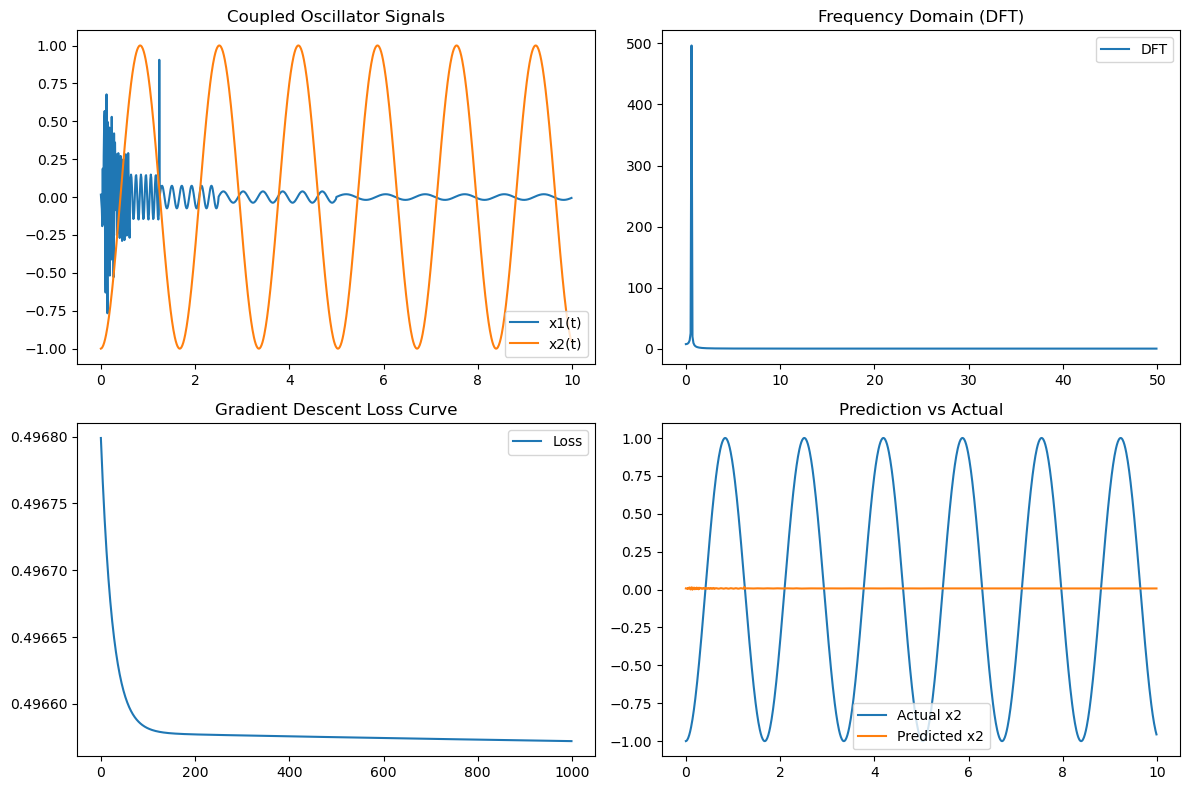

In [8]:
##############################################
# 4. Main Execution and Comparison
##############################################
if __name__ == "__main__":
    # Parameters for coupled oscillators
    m1, m2 = 1.0, 1.0
    k1, k2 = 10.0, 10.0
    kc = 2.0
    t_max = 10.0
    dt = 0.01

    # Simulate the system
    t, x1, x2 = simulate_coupled_oscillators(m1, m2, k1, k2, kc, t_max, dt)

    # Fourier Analysis
    print("Applying Fourier Analysis...")

    # DFT
    start_time = time.time()
    dft_result = dft(x1)
    dft_time = time.time() - start_time

    # FFT
    start_time = time.time()
    fft_result = fft(x1)
    fft_time = time.time() - start_time

    # STFT
    start_time = time.time()
    stft_result = stft(x1, window_size= 256, hop_size= 128)
    stft_time = time.time() - start_time

    # Haar Wavelet Transform
    start_time = time.time()
    haar_result = haar_wavelet_transform(x1)
    haar_time = time.time() - start_time

    # Compare Results
    print(f"DFT Time: {dft_time:.5f} seconds")
    print(f"FFT Time: {fft_time:.5f} seconds")
    print(f"STFT Time: {stft_time:.5f} seconds")
    print(f"Haar Transform Time: {haar_time:.5f} seconds")

    # Gradient Descent to Learn Patterns
    print("\nApplying Gradient Descent...")
    learning_rate = 0.01
    epochs = 1000

    w, b, losses = gradient_descent(x1, x2, learning_rate, epochs)
    print(f"Learned weight: {w}, bias: {b}")

    # Plot Results
    plt.figure(figsize=(12, 8))

    # Original Signals
    plt.subplot(2, 2, 1)
    plt.plot(t, x1, label="x1(t)")
    plt.plot(t, x2, label="x2(t)")
    plt.title("Coupled Oscillator Signals")
    plt.legend()
    
    # Fourier Transform
    plt.subplot(2, 2, 2)
    freqs = np.fft.fftfreq(len(x1), d=dt)
    plt.plot(freqs[:len(freqs)//2], np.abs(dft_result[:len(dft_result)//2]), label="DFT")
    plt.title("Frequency Domain (DFT)")
    plt.legend()

    # Loss Curve
    plt.subplot(2, 2, 3)
    plt.plot(losses, label="Loss")
    plt.title("Gradient Descent Loss Curve")
    plt.legend()

    # Predicted vs Actual
    plt.subplot(2, 2, 4)
    plt.plot(t, x2, label="Actual x2")
    plt.plot(t, w * x1 + b, label="Predicted x2")
    plt.title("Prediction vs Actual")
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
### No need to worry about prediction as we use simplest case of gradient discent ..
### Using advanced concepts like neural networks , we can predict the output of the model with high accuracy.

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x
    
# Neural Network to Learn Patterns
print("\nTraining Neural Network...")
x1_tensor = torch.tensor(x1, dtype=torch.float32).unsqueeze(1)  # Input to NN
x2_tensor = torch.tensor(x2, dtype=torch.float32).unsqueeze(1)  # Target

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

        # Forward pass
    predictions = model(x1_tensor)

        # Compute loss
    loss = criterion(predictions, x2_tensor)
    losses.append(loss.item())

        # Backward pass
    loss.backward()
    optimizer.step()
    
print("Training completed.")
print(f"Final Loss: {losses[-1]:.5f}")



Training Neural Network...
Training completed.
Final Loss: 0.48783


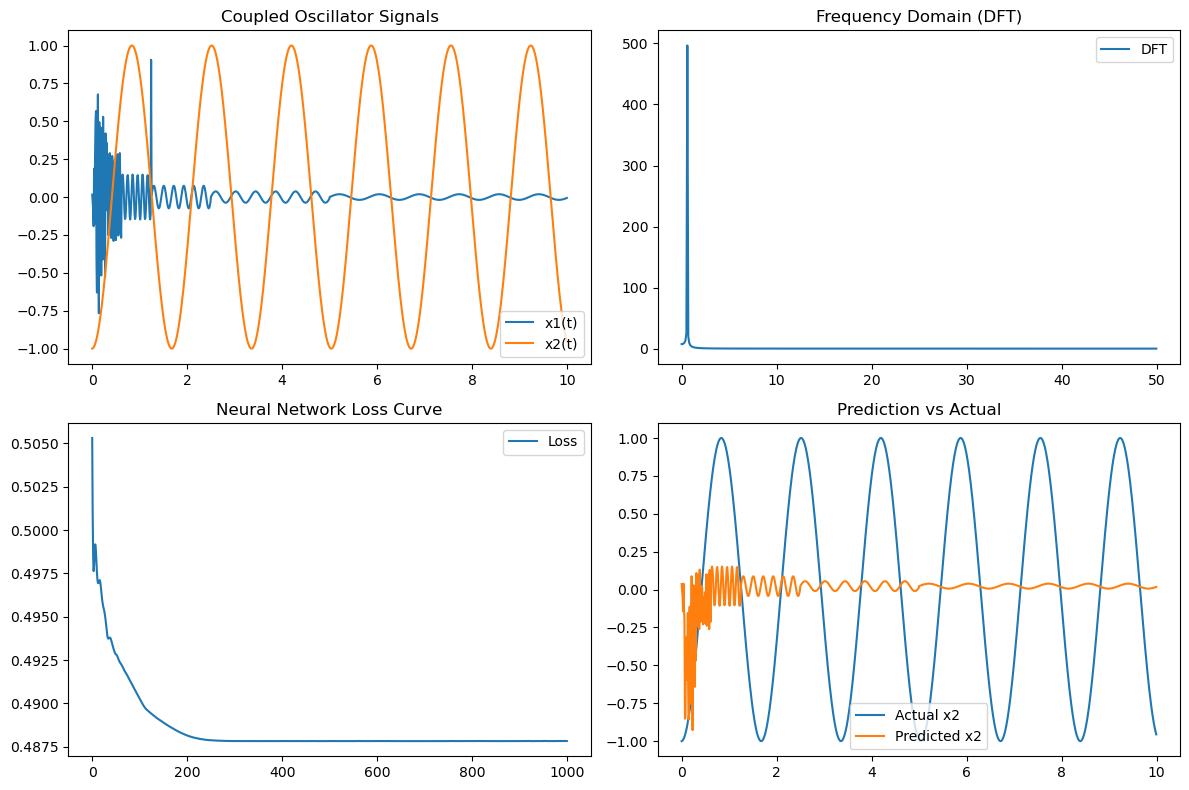

In [13]:
# Plot Results
plt.figure(figsize=(12, 8))

    # Original Signals
plt.subplot(2, 2, 1)
plt.plot(t, x1, label="x1(t)")
plt.plot(t, x2, label="x2(t)")
plt.title("Coupled Oscillator Signals")
plt.legend()

    # Fourier Transform
plt.subplot(2, 2, 2)
freqs = np.fft.fftfreq(len(x1), d=dt)
plt.plot(freqs[:len(freqs)//2], np.abs(dft_result[:len(dft_result)//2]), label="DFT")
plt.title("Frequency Domain (DFT)")
plt.legend()

    # Loss Curve
plt.subplot(2, 2, 3)
plt.plot(losses, label="Loss")
plt.title("Neural Network Loss Curve")
plt.legend()

    # Predicted vs Actual
plt.subplot(2, 2, 4)
with torch.no_grad():
    predicted_x2 = model(x1_tensor).squeeze().numpy()
plt.plot(t, x2, label="Actual x2")
plt.plot(t, predicted_x2, label="Predicted x2")
plt.title("Prediction vs Actual")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 100/2000, Loss: 0.00011
Epoch 200/2000, Loss: 0.00005
Epoch 300/2000, Loss: 0.00002
Epoch 400/2000, Loss: 0.00001
Epoch 500/2000, Loss: 0.00001
Epoch 600/2000, Loss: 0.00001
Epoch 700/2000, Loss: 0.00001
Epoch 800/2000, Loss: 0.00000
Epoch 900/2000, Loss: 0.00000
Epoch 1000/2000, Loss: 0.00000
Epoch 1100/2000, Loss: 0.00000
Epoch 1200/2000, Loss: 0.00000
Epoch 1300/2000, Loss: 0.00000
Epoch 1400/2000, Loss: 0.00000
Epoch 1500/2000, Loss: 0.00000
Epoch 1600/2000, Loss: 0.00000
Epoch 1700/2000, Loss: 0.00000
Epoch 1800/2000, Loss: 0.00000
Epoch 1900/2000, Loss: 0.00000
Epoch 2000/2000, Loss: 0.00000
Training completed.
Final Loss: 0.00000
R^2 Score: 1.0000


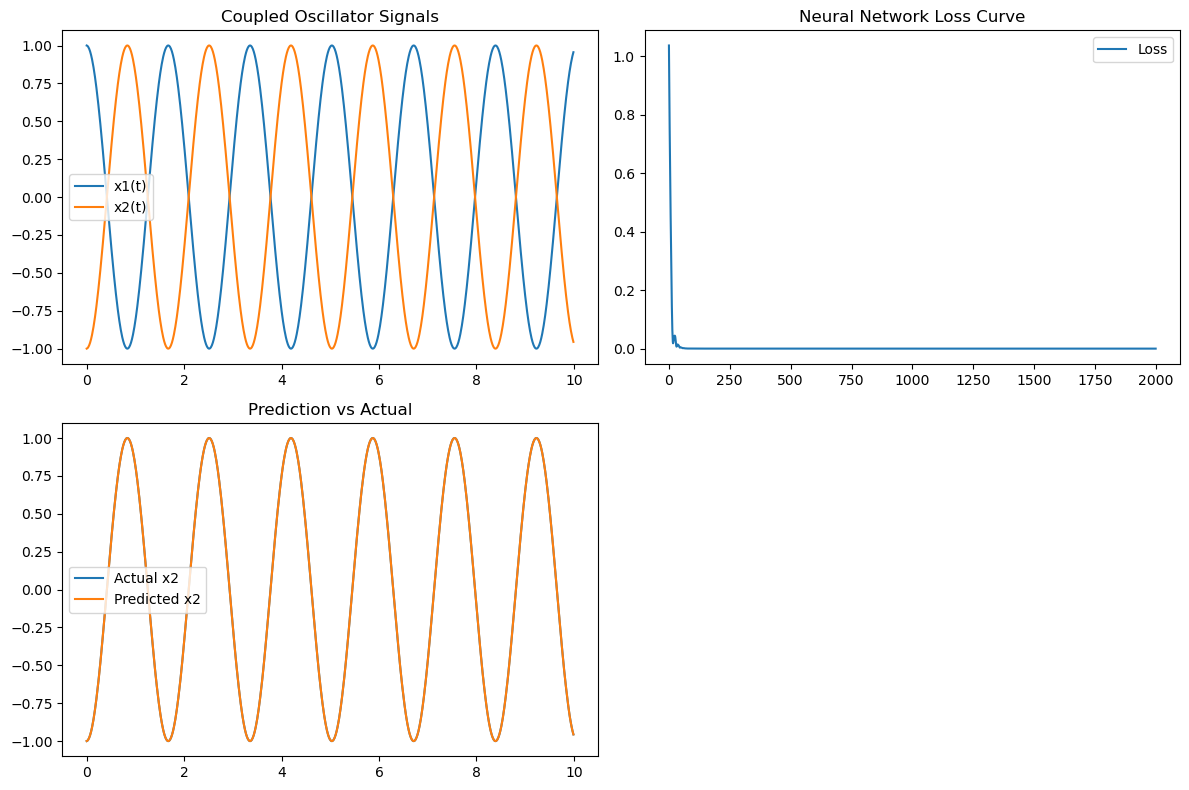

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

##############################################
# 2. Enhanced Neural Network to Learn Patterns
##############################################
class EnhancedNN(nn.Module):
    def __init__(self):
        super(EnhancedNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

##############################################
# 3. Main Execution and Comparison
##############################################
if __name__ == "__main__":
    # Parameters for coupled oscillators
    m1, m2 = 1.0, 1.0
    k1, k2 = 10.0, 10.0
    kc = 2.0
    t_max = 10.0
    dt = 0.01

    # Simulate the system
    t, x1, x2 = simulate_coupled_oscillators(m1, m2, k1, k2, kc, t_max, dt)

    # Normalize Data
    scaler_x1 = StandardScaler()
    scaler_x2 = StandardScaler()
    x1_scaled = scaler_x1.fit_transform(x1.reshape(-1, 1))
    x2_scaled = scaler_x2.fit_transform(x2.reshape(-1, 1))

    x1_tensor = torch.tensor(x1_scaled, dtype=torch.float32)
    x2_tensor = torch.tensor(x2_scaled, dtype=torch.float32)

    # Enhanced Neural Network
    model = EnhancedNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.5)

    epochs = 2000
    losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        predictions = model(x1_tensor)

        # Compute loss
        loss = criterion(predictions, x2_tensor)
        losses.append(loss.item())

        # Backward pass
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Print progress
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.5f}")

    print("Training completed.")
    print(f"Final Loss: {losses[-1]:.5f}")

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predicted_x2_scaled = model(x1_tensor).numpy()
        predicted_x2 = scaler_x2.inverse_transform(predicted_x2_scaled)

    # Calculate R^2 score for accuracy
    r2 = r2_score(x2, predicted_x2)
    print(f"R^2 Score: {r2:.4f}")

    # Plot Results
    plt.figure(figsize=(12, 8))

    # Original Signals
    plt.subplot(2, 2, 1)
    plt.plot(t, x1, label="x1(t)")
    plt.plot(t, x2, label="x2(t)")
    plt.title("Coupled Oscillator Signals")
    plt.legend()

    # Loss Curve
    plt.subplot(2, 2, 2)
    plt.plot(losses, label="Loss")
    plt.title("Neural Network Loss Curve")
    plt.legend()

    # Predicted vs Actual
    plt.subplot(2, 2, 3)
    plt.plot(t, x2, label="Actual x2")
    plt.plot(t, predicted_x2, label="Predicted x2")
    plt.title("Prediction vs Actual")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [16]:
### In this case neural network loss almost reduced to zero (perfect model to use in other test problems)

In [ ]:
### Periodic Systems: (three or more oscillators combined periodically)
